In [39]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
imagecount = 67

In [23]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [24]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
12300,00093019901,1,PillProjectDisc20/images/B3YL6NA3N32_P5PLS8RMN...,C3PI_Reference,VENLAFAXINE HYDROCHLORIDE,PillProjectDisc20,images,B3YL6NA3N32_P5PLS8RMND-P8-469NA.CR2,.CR2
12301,00093019901,1,PillProjectDisc36/images/BJ02FD1MH6JO6-1NGG9JZ...,C3PI_Reference,VENLAFAXINE HYDROCHLORIDE TABLETS,PillProjectDisc36,images,BJ02FD1MH6JO6-1NGG9JZ!-ENTP791I.CR2,.CR2
12302,00093019901,1,PillProjectDisc76/images/CSCD_Z4Z25VYWE-HKCIR7...,C3PI_Reference,VENLAFAXINE HYDROCHLORIDE TABLETS,PillProjectDisc76,images,CSCD_Z4Z25VYWE-HKCIR7ZXPE949MW8.CR2,.CR2
12303,00093019901,1,PillProjectDisc91/images/IR-D8SX42OCUDA2N7MGYH...,C3PI_Reference,VENLAFAXINE HYDROCHLORIDE,PillProjectDisc91,images,IR-D8SX42OCUDA2N7MGYH_8HO1NLER.CR2,.CR2
12305,00093019901,1,PillProjectDisc104/images/U_52ZDM5K4E72NGZRRGU...,C3PI_Test,VENLAFAXINE HYDROCHLORIDE,PillProjectDisc104,images,U_52ZDM5K4E72NGZRRGU1PUGJ-2D5M.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
92121,50111085201,1,PillProjectDisc79/images/CUQ6V!2XRG0HIK7V6A54W...,MC_COOKED_CALIBRATED_V1.2,VALPROIC ACID,PillProjectDisc79,images,CUQ6V!2XRG0HIK7V6A54WTW6X6CWNOF.PNG,.PNG
92122,50111085201,1,PillProjectDisc82/images/CXAEO6IAR3NL6LM6ASYY7...,MC_COOKED_CALIBRATED_V1.2,"VALPROIC ACID CAPSULES, USP",PillProjectDisc82,images,CXAEO6IAR3NL6LM6ASYY7I980DQ1BVM.PNG,.PNG
92123,50111085201,1,PillProjectDisc87/images/F3P-3_5VT2O04PZ-JLP6X...,MC_COOKED_CALIBRATED_V1.2,"VALPROIC ACID CAPSULES, USP",PillProjectDisc87,images,F3P-3_5VT2O04PZ-JLP6X4CY-Y4RHY.PNG,.PNG
92124,50111085201,1,PillProjectDisc92/images/JEZTD9F-87FY2JSU747QC...,MC_COOKED_CALIBRATED_V1.2,VALPROIC ACID,PillProjectDisc92,images,JEZTD9F-87FY2JSU747QC713S3BWQ9.PNG,.PNG


In [25]:
dfn.DRUG.value_counts()

WARFARIN SODIUM                                         68
WARFARIN SODIUM TABLETS, USP                            66
BENAZEPRIL HYDROCHLORIDE                                36
VENLAFAXINE HYDROCHLORIDE                               36
LISINOPRIL TABLETS USP                                  36
HYDRALAZINE HYDROCHLORIDE                               36
OLANZAPINE 20MG TAB                                     36
VALPROIC ACID CAPSULES, USP                             36
CYCLOBENZAPRINE HCL                                     34
NADOLOL TABLETS USP                                     34
VERAPAMIL HYDROCHLORIDE                                 34
METFORMIN HYDROCHLORIDE                                 34
CYCLOBENZAPRINE HYDROCHLORIDE TABLETS USP               33
METFORMIN HYDROCHLORIDE EXTENDED-RELEASE TABLETS USP    33
VERAPAMIL HCL EXTENDED-RELEASE TABLETS USP              33
NADOLOL                                                 33
OLANZAPINE TABLETS USP                                  

In [26]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(12,
 50111056301    67
 00093512701    67
 00093423601    67
 50111039701    67
 00555083202    67
 00555083502    67
 00172428060    67
 00093721201    67
 00172376260    67
 00093510556    67
 50111085201    67
 00093019901    67
 Name: NDC, dtype: int64)

In [27]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,BENAZEPRIL HYDROCHLORIDE,00093512701
1,BENAZEPRIL HYDROCHLORIDE TABLETS USP,00093512701
2,CYCLOBENZAPRINE HCL,50111056301
3,CYCLOBENZAPRINE HYDROCHLORIDE TABLETS USP,50111056301
4,HYDRALAZINE HYDROCHLORIDE,50111039701
5,HYDRALAZINE HYDROCHLORIDE TABLETS USP,50111039701
6,LISINOPRIL,00172376260
7,LISINOPRIL TABLETS USP,00172376260
8,METFORMIN HYDROCHLORIDE,00093721201
9,METFORMIN HYDROCHLORIDE EXTENDED-RELEASE TABLE...,00093721201


In [29]:
droplist = ['']

df = dfn[~dfn.NDC.isin(droplist)]

In [30]:
df.DRUG[df.NDC == '00093512701'] = 'BENAZEPRIL'
df.DRUG[df.NDC == '50111056301'] = 'CYCLOBENZAPRINE'
df.DRUG[df.NDC == '50111039701'] = 'HYDRALAZINE'
df.DRUG[df.NDC == '00172376260'] = 'LISINOPRIL'
df.DRUG[df.NDC == '00093721201'] = 'METFORMIN'
df.DRUG[df.NDC == '00093423601'] = 'NADOLOL'
df.DRUG[df.NDC == '00093510556'] = 'OLANZAPINE'
df.DRUG[df.NDC == '50111085201'] = 'VALPROIC ACID'
df.DRUG[df.NDC == '00093019901'] = 'VENLAFAXINE'
df.DRUG[df.NDC == '00172428060'] = 'VERAPAMIL HCL EXTENDED-RELEASE TABLETS'
df.DRUG[df.NDC == '00555083202'] = 'WARFARIN 2.5MG'
df.DRUG[df.NDC == '00555083502'] = 'WARFARIN 10MG'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [31]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
12300,00093019901,1,PillProjectDisc20/images/B3YL6NA3N32_P5PLS8RMN...,C3PI_Reference,VENLAFAXINE,PillProjectDisc20,images,B3YL6NA3N32_P5PLS8RMND-P8-469NA.CR2,.CR2
12301,00093019901,1,PillProjectDisc36/images/BJ02FD1MH6JO6-1NGG9JZ...,C3PI_Reference,VENLAFAXINE,PillProjectDisc36,images,BJ02FD1MH6JO6-1NGG9JZ!-ENTP791I.CR2,.CR2
12302,00093019901,1,PillProjectDisc76/images/CSCD_Z4Z25VYWE-HKCIR7...,C3PI_Reference,VENLAFAXINE,PillProjectDisc76,images,CSCD_Z4Z25VYWE-HKCIR7ZXPE949MW8.CR2,.CR2
12303,00093019901,1,PillProjectDisc91/images/IR-D8SX42OCUDA2N7MGYH...,C3PI_Reference,VENLAFAXINE,PillProjectDisc91,images,IR-D8SX42OCUDA2N7MGYH_8HO1NLER.CR2,.CR2
12305,00093019901,1,PillProjectDisc104/images/U_52ZDM5K4E72NGZRRGU...,C3PI_Test,VENLAFAXINE,PillProjectDisc104,images,U_52ZDM5K4E72NGZRRGU1PUGJ-2D5M.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
92121,50111085201,1,PillProjectDisc79/images/CUQ6V!2XRG0HIK7V6A54W...,MC_COOKED_CALIBRATED_V1.2,VALPROIC ACID,PillProjectDisc79,images,CUQ6V!2XRG0HIK7V6A54WTW6X6CWNOF.PNG,.PNG
92122,50111085201,1,PillProjectDisc82/images/CXAEO6IAR3NL6LM6ASYY7...,MC_COOKED_CALIBRATED_V1.2,VALPROIC ACID,PillProjectDisc82,images,CXAEO6IAR3NL6LM6ASYY7I980DQ1BVM.PNG,.PNG
92123,50111085201,1,PillProjectDisc87/images/F3P-3_5VT2O04PZ-JLP6X...,MC_COOKED_CALIBRATED_V1.2,VALPROIC ACID,PillProjectDisc87,images,F3P-3_5VT2O04PZ-JLP6X4CY-Y4RHY.PNG,.PNG
92124,50111085201,1,PillProjectDisc92/images/JEZTD9F-87FY2JSU747QC...,MC_COOKED_CALIBRATED_V1.2,VALPROIC ACID,PillProjectDisc92,images,JEZTD9F-87FY2JSU747QC713S3BWQ9.PNG,.PNG


In [32]:
df.DRUG.value_counts()

METFORMIN                                 67
NADOLOL                                   67
OLANZAPINE                                67
LISINOPRIL                                67
BENAZEPRIL                                67
WARFARIN 2.5MG                            67
HYDRALAZINE                               67
VALPROIC ACID                             67
CYCLOBENZAPRINE                           67
WARFARIN 10MG                             67
VENLAFAXINE                               67
VERAPAMIL HCL EXTENDED-RELEASE TABLETS    67
Name: DRUG, dtype: int64

In [33]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,BENAZEPRIL,00093512701
1,CYCLOBENZAPRINE,50111056301
2,HYDRALAZINE,50111039701
3,LISINOPRIL,00172376260
4,METFORMIN,00093721201
5,NADOLOL,00093423601
6,OLANZAPINE,00093510556
7,VALPROIC ACID,50111085201
8,VENLAFAXINE,00093019901
9,VERAPAMIL HCL EXTENDED-RELEASE TABLETS,00172428060


## Sample Batch

In [34]:
samplesdf = df.groupby(['NDC']).min().reset_index()
samplesdf

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00093019901,1,PillProjectDisc1/images/!!_ZD8_HSDUZKL2DNZR0BF...,C3PI_Reference,VENLAFAXINE,PillProjectDisc1,images,!!_ZD8_HSDUZKL2DNZR0BFANTHXZT_.PNG,.CR2
1,00093423601,1,PillProjectDisc1/images/!KHTRKMSDLR5U5-3689LM_...,C3PI_Reference,NADOLOL,PillProjectDisc1,images,!KHTRKMSDLR5U5-3689LM_IB2UCCF.JPG,.CR2
2,00093510556,1,PillProjectDisc10/images/7!XZGFAQRVHH3BNEP232Q...,C3PI_Reference,OLANZAPINE,PillProjectDisc10,images,-F1G0S93BUWX1ABRAKWTBXWS5Y7IJ.PNG,.CR2
3,00093512701,1,PillProjectDisc100/images/RCT2QON433J8DLNS_C7I...,C3PI_Reference,BENAZEPRIL,PillProjectDisc100,images,12YB7RO6WY!-EE6PJKQ-8M2MKNYDA6.JPG,.CR2
4,00093721201,1,PillProjectDisc10/images/7CWXIM0JW7K2CVJNZY867...,C3PI_Reference,METFORMIN,PillProjectDisc10,images,-1MU7551EEC17V8NS2F10AP-F4!FL9.CR2,.CR2
5,00172376260,1,PillProjectDisc1/images/!!EWJN4BQWYUSOQJ6GY4!O...,C3PI_Reference,LISINOPRIL,PillProjectDisc1,images,!!EWJN4BQWYUSOQJ6GY4!O58AQS6_I.PNG,.CR2
6,00172428060,1,PillProjectDisc1/images/!VIIPWAVW6!NQES_CIYUES...,C3PI_Reference,VERAPAMIL HCL EXTENDED-RELEASE TABLETS,PillProjectDisc1,images,!VIIPWAVW6!NQES_CIYUESEHTG3!6Z.PNG,.CR2
7,00555083202,1,PillProjectDisc1/images/!MOADXG470L!UBLN20KONW...,C3PI_Reference,WARFARIN 2.5MG,PillProjectDisc1,images,!MOADXG470L!UBLN20KONWGQWB8HFW.PNG,.CR2
8,00555083502,1,PillProjectDisc1/images/!2KR5JKA!_8ZAB59!WJNF0...,C3PI_Reference,WARFARIN 10MG,PillProjectDisc1,images,!2KR5JKA!_8ZAB59!WJNF00MV!UE1I.CR2,.CR2
9,50111039701,1,PillProjectDisc101/images/RZX81YZ0TYIDNU6ACYS_...,C3PI_Reference,HYDRALAZINE,PillProjectDisc101,images,1JY42MLCDVPZNVGJJEI0TV06AMLL7B.JPG,.CR2


In [35]:
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()
sampleslist

['PillProjectDisc1/images/!!EWJN4BQWYUSOQJ6GY4!O58AQS6_I.PNG',
 'PillProjectDisc1/images/!!_ZD8_HSDUZKL2DNZR0BFANTHXZT_.PNG',
 'PillProjectDisc1/images/!2KR5JKA!_8ZAB59!WJNF00MV!UE1I.CR2',
 'PillProjectDisc1/images/!KHTRKMSDLR5U5-3689LM_IB2UCCF.JPG',
 'PillProjectDisc1/images/!M1WIQW_QNW0GB8J3YCU1DU15GIEOW.JPG',
 'PillProjectDisc1/images/!MOADXG470L!UBLN20KONWGQWB8HFW.PNG',
 'PillProjectDisc1/images/!VIIPWAVW6!NQES_CIYUESEHTG3!6Z.PNG',
 'PillProjectDisc10/images/7!XZGFAQRVHH3BNEP232QGG-KJ-W8.JPG',
 'PillProjectDisc10/images/7CWXIM0JW7K2CVJNZY867PL3ZT-7DR.JPG',
 'PillProjectDisc100/images/RCT2QON433J8DLNS_C7ID4XY_0XO4T.PNG',
 'PillProjectDisc101/images/RZX81YZ0TYIDNU6ACYS_JHP1W_ZIS1.CR2',
 'PillProjectDisc101/images/S-5F!CTQAKA3MBNDXYFHOOWNIJ87E8.JPG']

In [36]:
ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

4

In [38]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

try:
    os.makedirs(paths)
except:
    print('Folder present')

%cd $folder
%pwd
dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

! cd ..

In [45]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img67'

In [46]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue
    

RZX81YZ0TYIDNU6ACYS_JHP1W_ZIS1.CR2
RZX81YZ0TYIDNU6ACYS_JHP1W_ZIS1.CR2
!2KR5JKA!_8ZAB59!WJNF00MV!UE1I.CR2
!2KR5JKA!_8ZAB59!WJNF00MV!UE1I.CR2


/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img67/img67


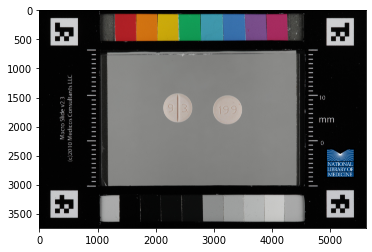

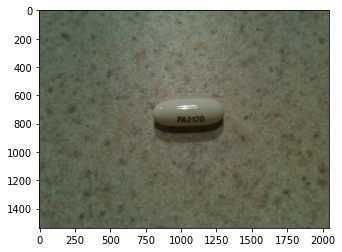

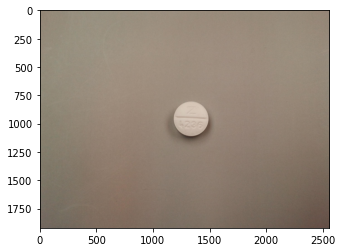

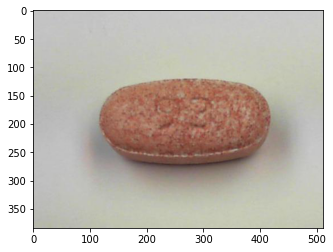

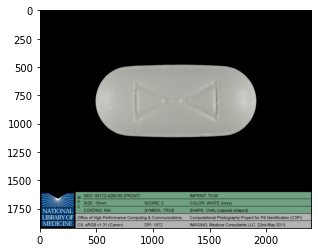

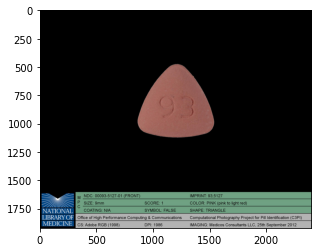

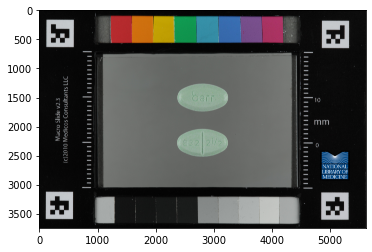

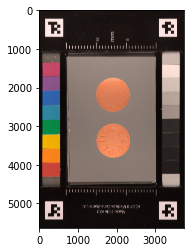

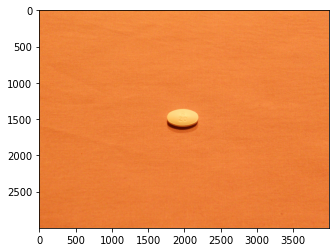

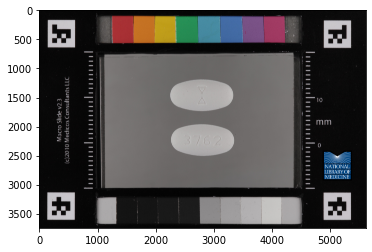

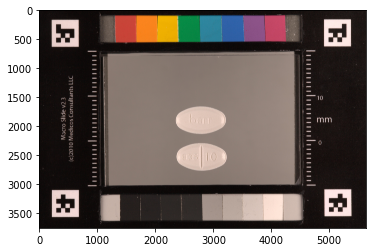

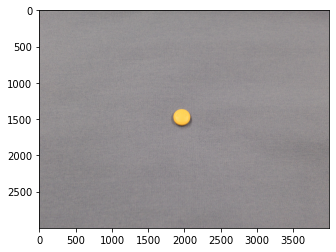

In [47]:
%cd $folder

images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)

In [22]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG',
 'PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG',
 'PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG',
 'PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG',
 'PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2',
 'PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ0JWYHZUT4.JPG',
 'PillProjectDisc10/images/7CBG_85RQOODGTH030MF3UI_3PS21B.PNG',
 'PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0CWL1MJT3CX.JPG',
 'PillProjectDisc100/images/QV3PUW3N2HL6KF8HSXV_1KL7HH98!E.JPG',
 'PillProjectDisc100/images/QY_4JH6D4YSSXZZHN2L!7LGE08P4QZ.PNG']

In [23]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

110

In [ ]:
%cd /content/drive/My Drive/Project: Pill ID/Data
for key in ftpdir.keys():
    #%cd /content/drive/My Drive/Project: Pill ID/Data
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    dloaded = os.listdir('/content/drive/My Drive/Project: Pill ID/Data')
    print(key)
    for value in ftpdir[key]:
      if value not in dloaded:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')